<a href="https://colab.research.google.com/github/raka-raprast/churn-prediction-svm/blob/main/Customer_Churn_Prediction_Using_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction Using Support Vector Machine
---
By: Raka Ramadhani Aulia Prasetyo

Dataset: [Telco customer churn: IBM dataset](https://www.kaggle.com/yeanzc/telco-customer-churn-ibm-dataset)

## Load and Assign Data

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rakaraprasetyo","key":"168203d666b12e693dc4b5eff3380a06"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d yeanzc/telco-customer-churn-ibm-dataset

  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 41.0MB/s]


In [7]:
!unzip telco-customer-churn-ibm-dataset.zip

Archive:  telco-customer-churn-ibm-dataset.zip
  inflating: Telco_customer_churn.xlsx  


In [8]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns

## Data Preprocessing

### General Information

In [9]:
# Read xlsx as dataset, convert the dataset into csv and sample 10 data
dataset = pd.read_excel('Telco_customer_churn.xlsx')
dataset.to_csv (r'telco_customer_churn.csv', index = None, header=True)
df = pd.read_csv('telco_customer_churn.csv')
df.sample(10)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
71,9512-UIBFX,1,United States,California,West Covina,91791,"34.061634, -117.893169",34.061634,-117.893169,Male,No,Yes,No,18,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,95.15,1779.95,Yes,1,68,4643,Don't know
5950,2404-JIBFC,1,United States,California,Anaheim,92804,"33.818, -117.974404",33.818000,-117.974404,Female,No,Yes,Yes,55,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),85.10,4657.95,No,0,67,5661,NaN
273,5981-ITEMU,1,United States,California,Marshall,94940,"38.129308, -122.834815",38.129308,-122.834815,Male,No,Yes,No,40,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),97.10,3706.95,Yes,1,67,3099,Competitor offered more data
5523,3446-QDSZF,1,United States,California,Homewood,96141,"39.117018, -120.212535",39.117018,-120.212535,Female,No,No,No,4,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,No,Credit card (automatic),55.50,227.35,No,0,66,2328,NaN
547,4958-GZWIY,1,United States,California,North Palm Springs,92258,"33.906496, -116.569499",33.906496,-116.569499,Male,No,Yes,No,7,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,48.70,340.25,Yes,1,98,2984,Don't know
1732,6661-HBGWL,1,United States,California,Mineral,96063,"40.408796, -121.579609",40.408796,-121.579609,Female,Yes,No,No,42,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),104.75,4323.45,Yes,1,79,2984,Network reliability
4340,1335-HQMKX,1,United States,California,Los Angeles,90044,"33.952714, -118.292061",33.952714,-118.292061,Female,No,Yes,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,101.35,7323.15,No,0,25,4497,NaN
4446,9257-AZMTZ,1,United States,California,Glendale,91205,"34.13658, -118.245839",34.136580,-118.245839,Female,No,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.10,1078.75,No,0,71,4529,NaN
4241,0585-EGDDA,1,United States,California,Etna,96027,"41.405193, -123.008567",41.405193,-123.008567,Male,No,Yes,No,40,Yes,No,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,80.00,3168.75,No,0,31,2478,NaN
6159,6933-VLYFX,1,United States,California,Belmont,94002,"37.509366, -122.306132",37.509366,-122.306132,Male,No,Yes,Yes,31,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,59.95,1848.8,No,0,37,4337,NaN


In [10]:
# Gather general data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

Column Explanation

* CustomerID: A unique ID that identifies each customer.

* Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

* Country: The country of the customer’s primary residence.

* State: The state of the customer’s primary residence.

* City: The city of the customer’s primary residence.

* Zip Code: The zip code of the customer’s primary residence.

* Lat Long: The combined latitude and longitude of the customer’s primary residence.

* Latitude: The latitude of the customer’s primary residence.

* Longitude: The longitude of the customer’s primary residence.

* Gender: The customer’s gender: Male, Female

* Senior Citizen: Indicates if the customer is 65 or older: Yes, No

* Partner: Indicate if the customer has a partner: Yes, No

* Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

* Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

* Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

* Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

* Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

* Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

* Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

* Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

* Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

* Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

* Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

* Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

* Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

* Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

* Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

* Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

* Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

* CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

* Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

### Data Cleaning

In [11]:
# Simplify column name
df.columns = ['customer_id', 'count', 'country', 'state', 'city', 'zip_code', 'lat_long', 'latitude', 'longitude', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure_month', 'phone_service', 'multiple_line', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges', 'churn_label', 'churn_value', 'churn_score', 'cltv', 'churn_reason']

In [12]:
# Drop a column that cannot be processed
df = df.drop(['customer_id', 'count', 'country', 'state', 'city', 'zip_code', 'lat_long', 'latitude', 'longitude'], axis = 1)
df.sample(5)

,gender,senior_citizen,partner,dependents,tenure_month,phone_service,multiple_line,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv,churn_reason
5568,Female,No,Yes,No,41,No,No phone service,DSL,No,Yes,No,Yes,No,No,One year,No,Mailed check,35.45,1391.65,No,0,80,2954,NaN
2458,Male,No,No,No,63,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Bank transfer (automatic),40.60,2588.95,No,0,80,6406,NaN
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4207,Female,No,No,No,50,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.35,1033,No,0,39,5247,NaN
5394,Female,No,Yes,No,5,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,68.95,351.5,No,0,57,5536,NaN


#### Converting Data Types

In [13]:
# Changing NaN to new category
df[['churn_reason']] = df[['churn_reason']].fillna('Not Churn')

In [14]:
# Converting total_charges to float64
df['total_charges'] = df['total_charges'].replace(' ', np.nan)
df['total_charges'] = df['total_charges'].astype('float64')

In [15]:
# Convert the Data that has a relation to category
df["internet_service"] = df["internet_service"].astype('category')
df["gender"] = df["gender"].astype('category')
df["contract"] = df["contract"].astype('category')
df["payment_method"] = df["payment_method"].astype('category')
df['senior_citizen'] = df['senior_citizen'].astype('category')
df['partner'] = df['partner'].astype('category')
df['dependents'] = df['dependents'].astype('category')
df['multiple_line'] = df['multiple_line'].astype('category')
df['online_security'] = df['online_security'].astype('category')
df['online_backup'] = df['online_backup'].astype('category')
df['device_protection'] = df['device_protection'].astype('category')
df['tech_support'] = df['tech_support'].astype('category')
df['streaming_tv'] = df['streaming_tv'].astype('category')
df['streaming_movies'] = df['streaming_movies'].astype('category')
df['paperless_billing'] = df['paperless_billing'].astype('category')
df['churn_reason'] = df['churn_reason'].astype('category')
df['churn_label'] = df['churn_label'].astype('category')
df['phone_service'] = df['phone_service'].astype('category')

In [16]:
df.dtypes

gender               category
senior_citizen       category
partner              category
dependents           category
tenure_month            int64
phone_service        category
multiple_line        category
internet_service     category
online_security      category
online_backup        category
device_protection    category
tech_support         category
streaming_tv         category
streaming_movies     category
contract             category
paperless_billing    category
payment_method       category
monthly_charges       float64
total_charges         float64
churn_label          category
churn_value             int64
churn_score             int64
cltv                    int64
churn_reason         category
dtype: object

Understanding:
* NaN in churn_reason assigned as a "Not Churn" because churn_value shown 0 or churn_label value is "No" means the NaN appears Not Churn
* The total_charges can't be converted to float and error appears said the string couldn't be convert to float assuming that there is blank space that needed to be converted to NaN

#### Handling Missing Data

In [17]:
df.isnull().sum()

gender                0
senior_citizen        0
partner               0
dependents            0
tenure_month          0
phone_service         0
multiple_line         0
internet_service      0
online_security       0
online_backup         0
device_protection     0
tech_support          0
streaming_tv          0
streaming_movies      0
contract              0
paperless_billing     0
payment_method        0
monthly_charges       0
total_charges        11
churn_label           0
churn_value           0
churn_score           0
cltv                  0
churn_reason          0
dtype: int64

In [18]:
df.dropna(subset = ["total_charges"], inplace=True)

Understanding:
* The missing data from total_charges are the blank space that converted to NaN

#### Checking Outliers

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline

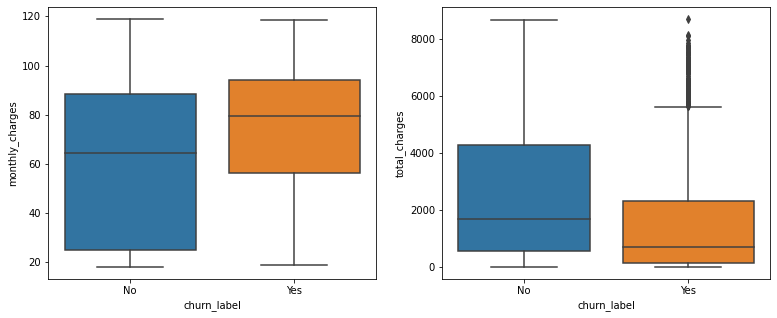

In [20]:
# check outlier via boxplot
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,3,2)
sns.boxplot(x='churn_label',y='monthly_charges',data=df,ax=ax1)
ax2 = fig.add_subplot(1,3,3)
sns.boxplot(x='churn_label',y='total_charges',data=df,ax=ax2)
plt.show()

Understanding:
* outliers in total_charges are understandable as it still in a safe range

## Exploratory Data Analysis

### Statistical Summary

In [21]:
# check summary statistics
df.describe().round(2)

,tenure_month,monthly_charges,total_charges,churn_value,churn_score,cltv
count,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00
mean,32.42,64.80,2283.30,0.27,58.72,4401.45
std,24.55,30.09,2266.77,0.44,21.53,1182.41
min,1.00,18.25,18.80,0.00,5.00,2003.00
25%,9.00,35.59,401.45,0.00,40.00,3469.75
50%,29.00,70.35,1397.48,0.00,61.00,4527.50
75%,55.00,89.86,3794.74,1.00,75.00,5381.00
max,72.00,118.75,8684.80,1.00,100.00,6500.00


Understanding:
* The longer the Tenure the larger the charges the customer spent
* Churn Value q1,q2 and q3 doesn't represent anything since the data only between 0 and 1

### Categorical Variable
The Exploratory Data Analysis within variable are using a real data set as it represent the whole real data

#### Gender

Text(0.5, 1.0, 'Distribution of Tenure Month vs Gender with the Churn Value class')

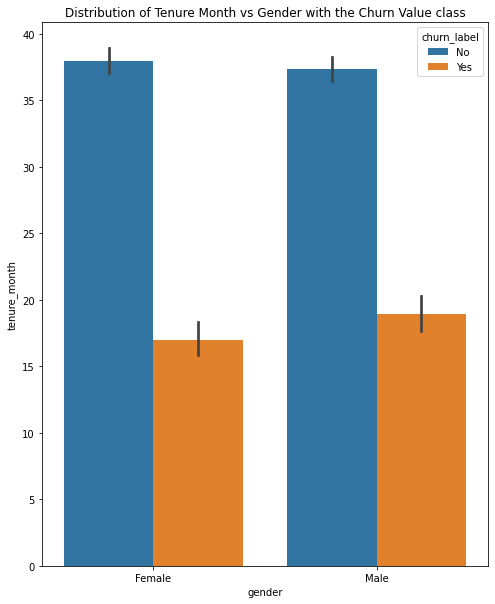

In [22]:
plt.figure(figsize=(8,10))
sns.barplot(data=df,y='tenure_month',x ='gender',hue = 'churn_label')
plt.title('Distribution of Tenure Month vs Gender with the Churn Value class')

Understanding:
* Both female and male has a similar result on churn means they don't have a relations on churn

#### Senior Citizen

Text(0.5, 1.0, 'Distribution of Tenure Month vs Senior Citizen with the Churn Value class')

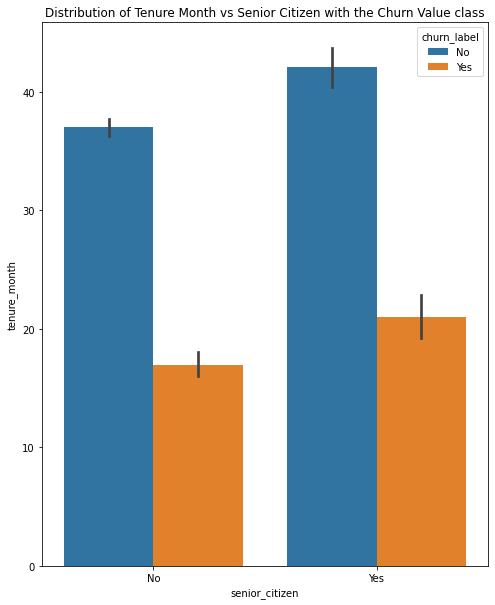

In [23]:
plt.figure(figsize=(8,10))
sns.barplot(data=df,y='tenure_month',x ='senior_citizen',hue = 'churn_label')
plt.title('Distribution of Tenure Month vs Senior Citizen with the Churn Value class')

Understanding:
* Senior Citizen had slightly higher churn than non Senior Citizen but also had slightly higher no churn than the non Senior Citizen.

#### Partner

Text(0.5, 1.0, 'Distribution of Tenure Month vs Partner with the Churn Value class')

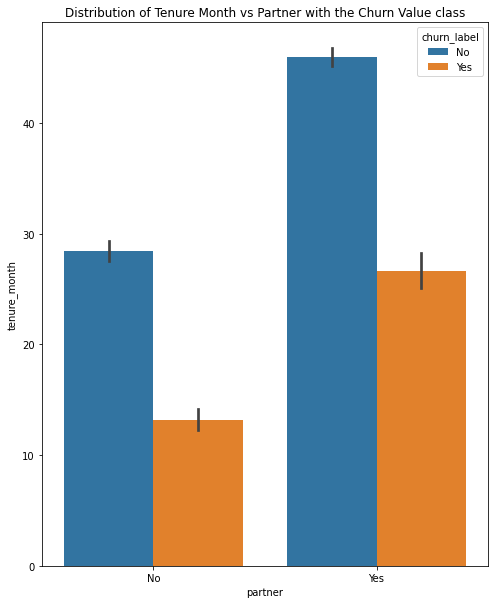

In [24]:
plt.figure(figsize=(8,10))
sns.barplot(data=df,y='tenure_month',x ='partner',hue = 'churn_label')
plt.title('Distribution of Tenure Month vs Partner with the Churn Value class')

Understanding:
* Customer who have a partner significantly increase in churn than a customer who doesn't but the customer who have a partner also significantly increase to No Churn than the customer who doesn't have partner.

#### Dependents

Text(0.5, 1.0, 'Distribution of Tenure Month vs Partner with the Churn Value class')

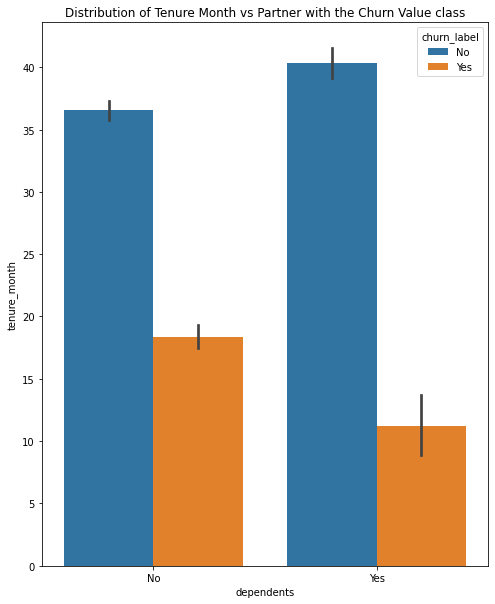

In [25]:
plt.figure(figsize=(8,10))
sns.barplot(data=df,y='tenure_month',x ='dependents',hue = 'churn_label')
plt.title('Distribution of Tenure Month vs Partner with the Churn Value class')

Understanding:
* Customer who live with their dependents has slightly lower churn than a customer who doesn't live with their dependent

#### Payment Method

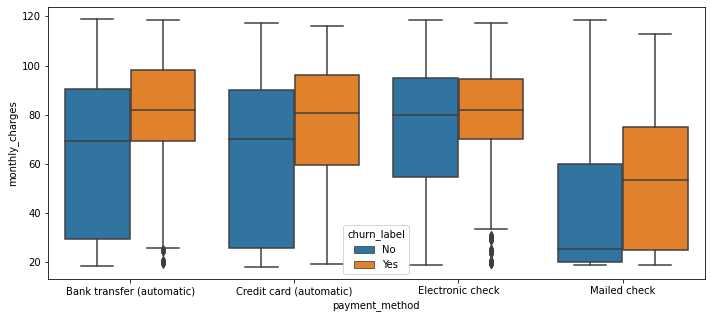

In [26]:
# check outlier via boxplot
fig=plt.figure(figsize=(40,5))
ax3=fig.add_subplot(1,3,2)
sns.boxplot(x='payment_method',y='monthly_charges',data=df,ax=ax3,hue='churn_label')
plt.show()

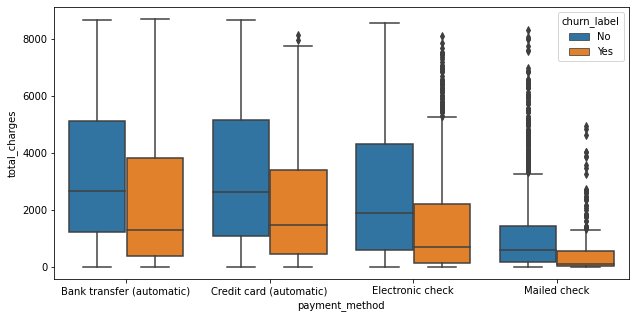

In [27]:
# check outlier via boxplot
fig=plt.figure(figsize=(35,5))
ax4=fig.add_subplot(1,3,3)
sns.boxplot(x='payment_method',y='total_charges',data=df,ax=ax4,hue='churn_label')
plt.show()

Electronic Check: 2365
Mailed Check: 1604
Bank Transfer: 1542
Credit Card: 1521


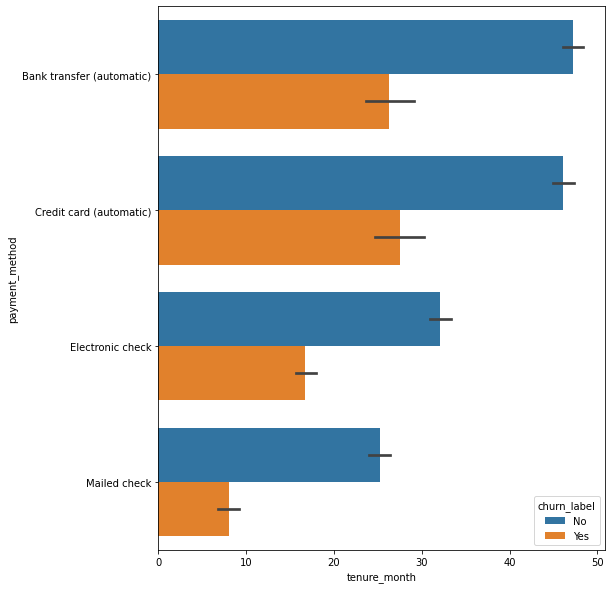

In [28]:
pay_count = df.payment_method.value_counts()
print('Electronic Check:', pay_count[0])
print('Mailed Check:', pay_count[1])
print('Bank Transfer:', pay_count[2])
print('Credit Card:', pay_count[3])
plt.figure(figsize=(8,10))
sns.barplot(data=df,y='payment_method',x ='tenure_month',hue = 'churn_label')

Understanding:
* Customer who use Electronic Check has lower Tenure month than the rest even thought it has a biggest data amongst the other payment method.
* Customer who use Credit card as a payment method had more than 40 tenure month even thought it has a smallest data.

In [29]:
print('Minimum Tenure : ', df['tenure_month'].min())
print('Maximum Tenure : ', df['tenure_month'].max())

Minimum Tenure :  1
Maximum Tenure :  72


In [30]:
df_viz = df.copy()

In [31]:
bins= [0,12,24,36,48, 60, 73]
labels = ['1st Year','2nd Year','3rd Year','4th Year','5th Year','6th Year']
df_viz['annual_tenure'] = pd.cut(df_viz['tenure_month'], bins=bins, labels=labels, right=False)

In [32]:
df_viz

,gender,senior_citizen,partner,dependents,tenure_month,phone_service,multiple_line,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv,churn_reason,annual_tenure
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,1st Year
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,1st Year
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved,1st Year
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved,3rd Year
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices,5th Year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0,45,5306,Not Churn,6th Year
7039,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0,59,2140,Not Churn,3rd Year
7040,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,71,5560,Not Churn,6th Year
7041,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,Not Churn,1st Year


#### Contract

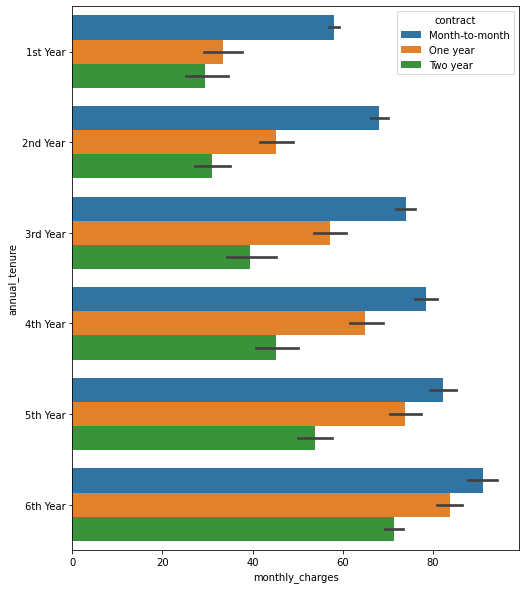

In [33]:
plt.figure(figsize=(8,10))
sns.barplot(data=df_viz,x='monthly_charges',y='annual_tenure',hue='contract')

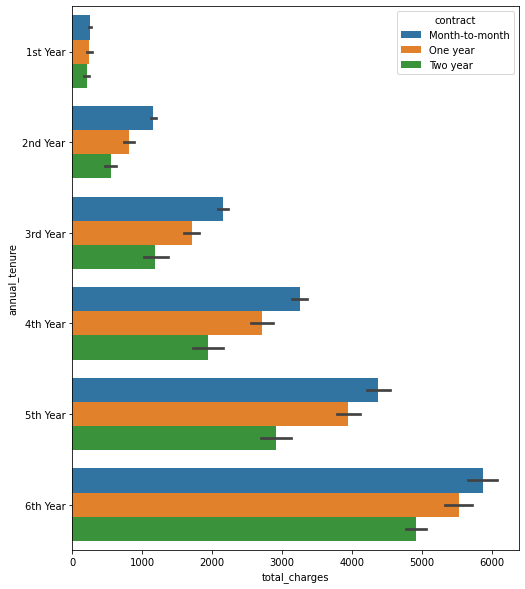

In [34]:
plt.figure(figsize=(8,10))
sns.barplot(data=df_viz,x='total_charges',y='annual_tenure',hue='contract')

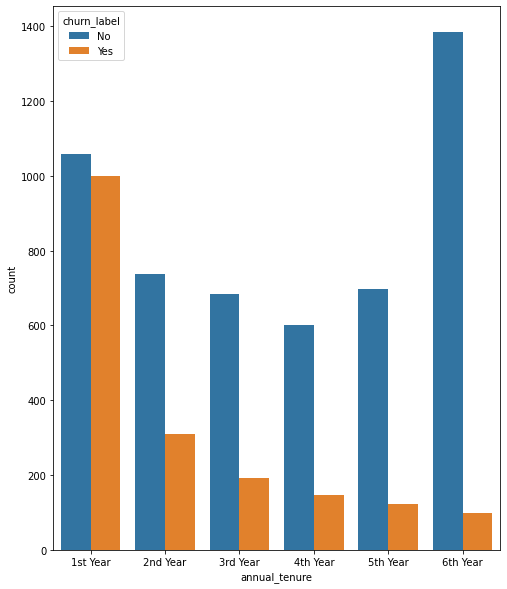

In [35]:
plt.figure(figsize=(8,10))
sns.countplot(data=df_viz,x='annual_tenure',hue='churn_label')

Understanding:
* Total Charges and Monthly Charges steadily increase each years and it is fairly normal.
* Customer tend to churn on their first year.

#### Additional Service

In [36]:
add_service=['phone_service','multiple_line','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','internet_service']
def service_plot(n,a):
  fig = plt.figure(figsize=(8,10))
  axn = fig.add_subplot(2,1,a)
  sns.barplot(data=df_viz,y='churn_value',x='annual_tenure',hue=add_service[n],ax=axn)

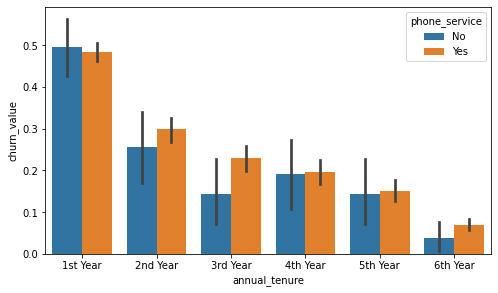

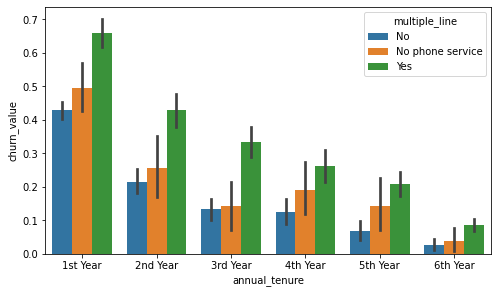

In [37]:
service_plot(0,1)
service_plot(1,1)

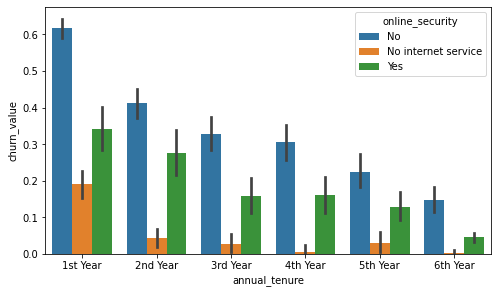

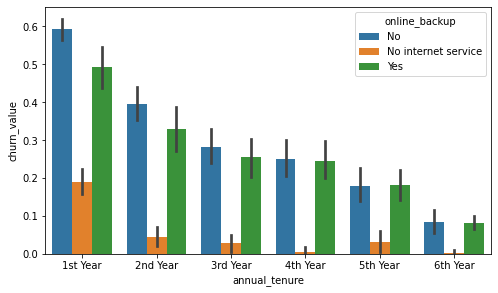

In [38]:
service_plot(2,1)
service_plot(3,1)

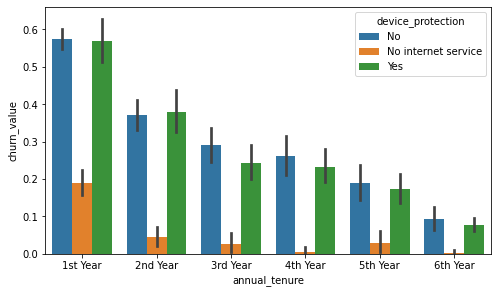

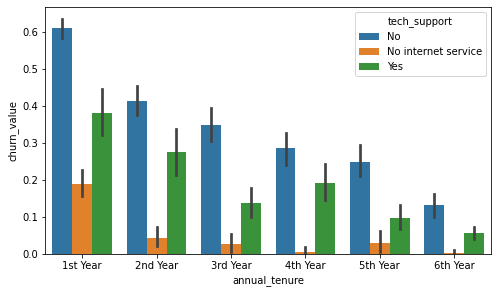

In [39]:
service_plot(4,1)
service_plot(5,1)

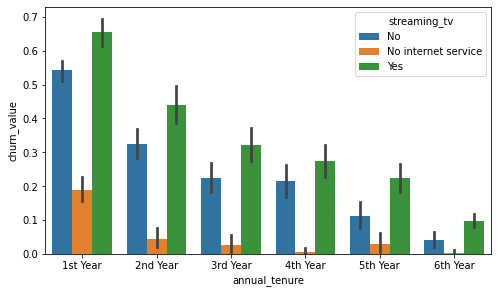

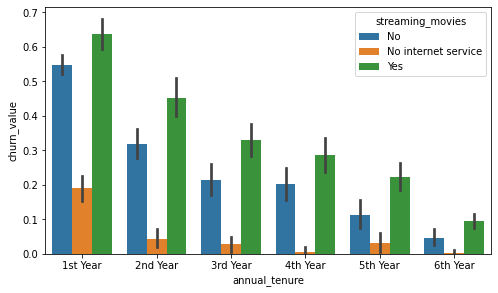

In [40]:
service_plot(6,1)
service_plot(7,1)

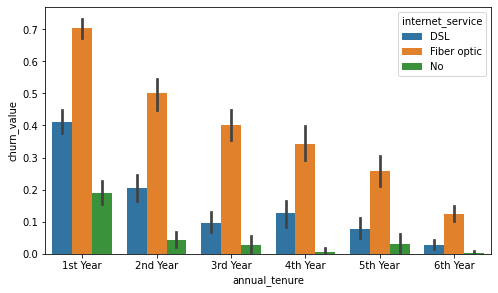

In [41]:
service_plot(8,1)

Understanding:
* Customer with no internet related service has a higher churn value than a customer who does have.
* Customer who use Fiber Optic as their Internet Service has a highest Churn Value than a customer who use DSL and a customer who doesn't use Internet Service.
* Customer who subscribe for a streaming related service has a highest Churn Value than the other who don't
* 1st year of Annual Tenure have a highest Churn Value.

#### Numeric Variable

In [42]:
numeric_df = df.drop(['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'multiple_line', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'churn_reason', 'churn_label'], axis = 1)

In [43]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure_month     7032 non-null   int64  
 1   monthly_charges  7032 non-null   float64
 2   total_charges    7032 non-null   float64
 3   churn_value      7032 non-null   int64  
 4   churn_score      7032 non-null   int64  
 5   cltv             7032 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 704.6 KB


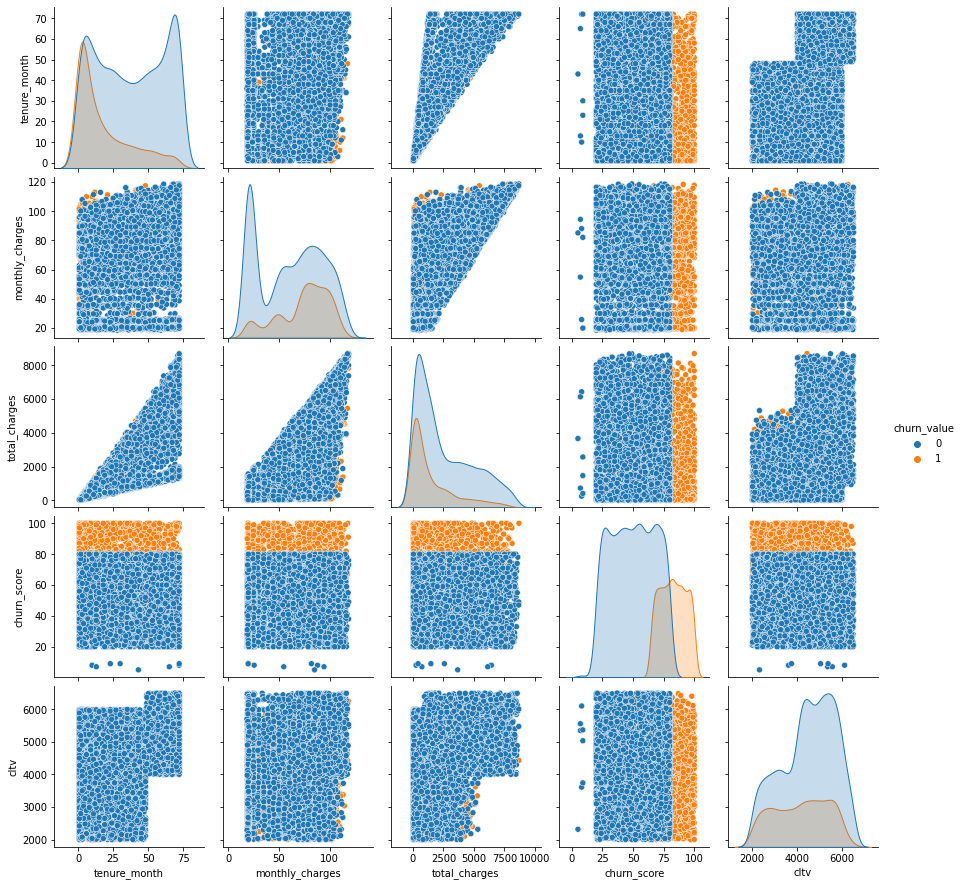

In [44]:
sns.pairplot(hue="churn_value",data=numeric_df)

Understanding:
* Monthly Charge and Total Charge to churn distribution are fairly normal as it is linear
* Churn score prediction for churn distribution started on 50 up to 100
* Churn score to Tenure Month, Monthly Charges, and Total Charges showing a similar result

### Random Undersampling

Class 0: 5163
Class 1: 1869
Proportion: 2.76 : 1


Text(0.5, 1.0, 'Count (Churn)')

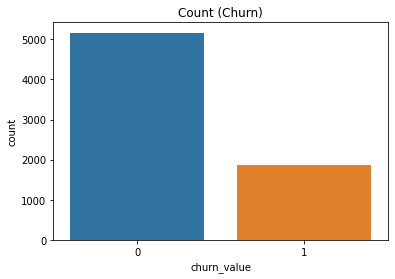

In [45]:
# Checking imbalance data
target_count = df.churn_value.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
sns.countplot(data=df,x='churn_value')
plt.title('Count (Churn)')

In [46]:
# Class count
count_class_0, count_class_1 = df.churn_value.value_counts()

# Divide by class
df_class_0 = df[df['churn_value'] == 0]
df_class_1 = df[df['churn_value'] == 1]

In [47]:
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

Random under-sampling:
1    1869
0    1869
Name: churn_value, dtype: int64


Text(0.5, 1.0, 'Count (Churn)')

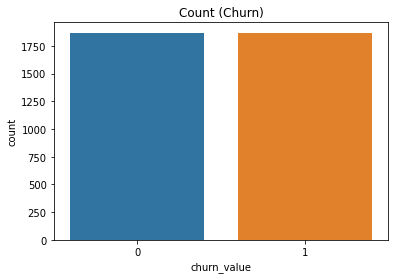

In [48]:
print('Random under-sampling:')
print(df_under.churn_value.value_counts())

sns.countplot(data=df_under,x='churn_value')
plt.title('Count (Churn)')

Understanding:
* The data is imbalance as shown from the proportion above it's 2.76 : 1
* The imbalance data problem handled by doing a Random Oversampling

### Features Correlation

In [49]:
dfn=df_under.copy()

In [50]:
dfn

,gender,senior_citizen,partner,dependents,tenure_month,phone_service,multiple_line,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv,churn_reason
4675,Male,No,No,No,17,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.65,351.55,No,0,35,4774,Not Churn
2446,Female,No,No,No,11,No,No phone service,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Mailed check,35.80,363.15,No,0,44,2534,Not Churn
6116,Female,No,No,No,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,266.60,No,0,60,4497,Not Churn
5579,Male,No,Yes,Yes,9,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,101.50,906.85,No,0,60,2757,Not Churn
4852,Female,No,Yes,No,64,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,No,Two year,Yes,Credit card (automatic),94.60,5948.70,No,0,26,5038,Not Churn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,Male,No,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes,1,69,4581,Competitor offered higher download speeds
1865,Female,No,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes,1,87,2029,Competitor offered higher download speeds
1866,Male,Yes,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,1,97,5571,Competitor offered higher download speeds
1867,Female,No,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,1,70,5620,Competitor offered more data


In [51]:
dfn['senior_citizen'] = dfn['senior_citizen'].map(
                   {'Yes':1 ,'No':0})
dfn['partner'] = dfn['partner'].map(
                   {'Yes':1 ,'No':0})
dfn['phone_service'] = dfn['phone_service'].map(
                   {'Yes':1 ,'No':0})
dfn['dependents'] = dfn['dependents'].map(
                   {'Yes':1 ,'No':0})
dfn['multiple_line'] = dfn['multiple_line'].map(
                   {'Yes':1 ,'No':0, 'No phone service':0})
dfn['online_security'] = dfn['online_security'].map(
                   {'Yes':1 ,'No':0, 'No internet service':0})
dfn['online_backup'] = dfn['online_backup'].map(
                   {'Yes':1 ,'No':0, 'No internet service':0})
dfn['device_protection'] = dfn['device_protection'].map(
                   {'Yes':1 ,'No':0, 'No internet service':0})
dfn['tech_support'] = dfn['tech_support'].map(
                   {'Yes':1 ,'No':0, 'No internet service':0})
dfn['streaming_tv'] = dfn['streaming_tv'].map(
                   {'Yes':1 ,'No':0, 'No internet service':0})
dfn['streaming_movies'] = dfn['streaming_movies'].map(
                   {'Yes':1 ,'No':0, 'No internet service':0})
dfn['paperless_billing'] = dfn['paperless_billing'].map(
                   {'Yes':1 ,'No':0})
dfn['churn_label'] = dfn['churn_label'].map(
                   {'Yes':1 ,'No':0})

In [52]:
dfn['gender'] = dfn['gender'].cat.codes
dfn['senior_citizen'] = dfn['senior_citizen'].cat.codes
dfn['partner'] = dfn['partner'].cat.codes
dfn['dependents'] = dfn['dependents'].cat.codes
dfn['paperless_billing'] = dfn['paperless_billing'].cat.codes
dfn["internet_service"] = dfn["internet_service"].cat.codes
dfn["contract"] = dfn["contract"].cat.codes
dfn["payment_method"] = dfn["payment_method"].cat.codes
dfn["churn_reason"] = dfn["churn_reason"].cat.codes

In [53]:
dfn["internet_service"] = dfn["internet_service"].astype('int64')
dfn["gender"] = dfn["gender"].astype('int64')
dfn["contract"] = dfn["contract"].astype('int64')
dfn["payment_method"] = dfn["payment_method"].astype('int64')
dfn['senior_citizen'] = dfn['senior_citizen'].astype('int64')
dfn['partner'] = dfn['partner'].astype('int64')
dfn['dependents'] = dfn['dependents'].astype('int64')
dfn['paperless_billing'] = dfn['paperless_billing'].astype('int64')
dfn['churn_reason'] = dfn['churn_reason'].astype('int64')
dfn['churn_label'] = dfn['churn_label'].astype('int64')
dfn['phone_service'] = dfn['phone_service'].astype('int64')

In [54]:
dfn.dtypes

gender                 int64
senior_citizen         int64
partner                int64
dependents             int64
tenure_month           int64
phone_service          int64
multiple_line          int64
internet_service       int64
online_security        int64
online_backup          int64
device_protection      int64
tech_support           int64
streaming_tv           int64
streaming_movies       int64
contract               int64
paperless_billing      int64
payment_method         int64
monthly_charges      float64
total_charges        float64
churn_label            int64
churn_value            int64
churn_score            int64
cltv                   int64
churn_reason           int64
dtype: object

In [55]:
dfn.sample(5)

,gender,senior_citizen,partner,dependents,tenure_month,phone_service,multiple_line,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv,churn_reason
4474,1,0,1,1,37,1,0,2,0,0,0,0,0,0,1,0,1,19.80,677.05,0,0,24,5137,15
490,0,0,0,0,3,1,0,1,0,1,0,0,1,0,0,0,2,83.75,247.25,1,1,65,4852,1
6838,0,0,0,0,12,0,0,0,1,0,1,1,0,1,2,0,3,49.85,552.10,0,0,20,3100,15
1801,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,70.30,70.30,1,1,78,4512,7
3104,1,1,0,1,7,1,0,0,0,0,0,0,0,0,0,1,3,45.75,344.20,0,0,57,3779,15


In [56]:
numeric_column = ['gender','senior_citizen','partner','dependents','multiple_line','internet_service','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','contract','paperless_billing','payment_method','churn_value','churn_reason','churn_label','monthly_charges','total_charges','churn_score','cltv','tenure_month']

In [57]:
dfn[numeric_column].describe()

,gender,senior_citizen,partner,dependents,multiple_line,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn_value,churn_reason,churn_label,monthly_charges,total_charges,churn_score,cltv,tenure_month
count,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000
mean,0.504548,0.190744,0.441413,0.169342,0.431514,0.841627,0.252541,0.325575,0.327448,0.260032,0.402354,0.398876,0.513109,0.632691,1.619048,0.500000,11.393258,0.500000,68.039674,2056.853077,66.345104,4325.714553,27.860086
std,0.500046,0.392940,0.496622,0.375104,0.495354,0.674519,0.434528,0.468652,0.469345,0.438710,0.490438,0.489733,0.763752,0.482136,1.024391,0.500067,5.754590,0.500067,28.697195,2193.345976,21.737042,1203.216133,24.107387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.400000,18.800000,5.000000,2003.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,0.000000,45.650000,271.212500,50.000000,3344.000000,5.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.500000,15.000000,0.500000,74.600000,1178.325000,71.000000,4463.500000,22.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,15.000000,1.000000,91.087500,3273.737500,82.000000,5347.750000,49.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,20.000000,1.000000,118.750000,8684.800000,100.000000,6491.000000,72.000000


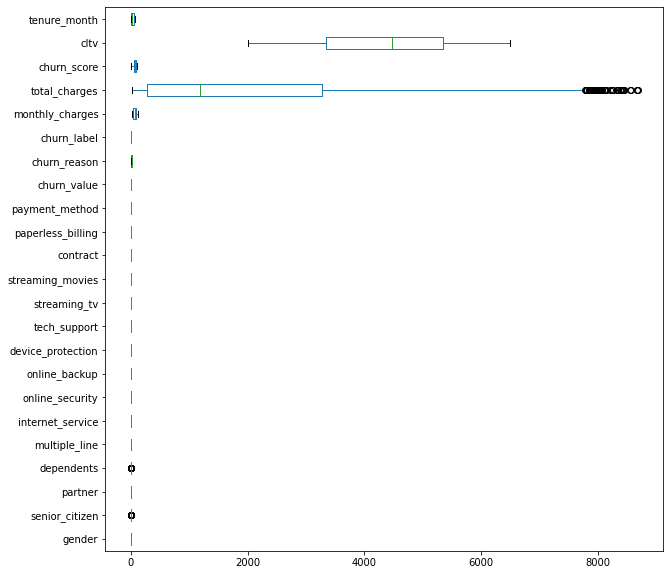

In [58]:
dfn.boxplot(column=numeric_column,fontsize=10,rot=0,grid=False,figsize=(10,10),vert=False)

In [59]:
dfn.dtypes

gender                 int64
senior_citizen         int64
partner                int64
dependents             int64
tenure_month           int64
phone_service          int64
multiple_line          int64
internet_service       int64
online_security        int64
online_backup          int64
device_protection      int64
tech_support           int64
streaming_tv           int64
streaming_movies       int64
contract               int64
paperless_billing      int64
payment_method         int64
monthly_charges      float64
total_charges        float64
churn_label            int64
churn_value            int64
churn_score            int64
cltv                   int64
churn_reason           int64
dtype: object

In [60]:
numeric_column_filtered = ['gender', 'partner', 'multiple_line', 'internet_service', 'online_backup', 'device_protection', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'churn_value', 'monthly_charges', 'total_charges', 'churn_score', 'cltv', 'tenure_month','churn_label','churn_reason']

In [61]:
Q1 = dfn[numeric_column].quantile(0.25)
Q3 = dfn[numeric_column].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 gender                  0.0000
senior_citizen          0.0000
partner                 0.0000
dependents              0.0000
multiple_line           0.0000
internet_service        0.0000
online_security         0.0000
online_backup           0.0000
device_protection       0.0000
tech_support            0.0000
streaming_tv            0.0000
streaming_movies        0.0000
contract                0.0000
paperless_billing       0.0000
payment_method          1.0000
churn_value             0.0000
churn_reason            5.0000
churn_label             0.0000
monthly_charges        45.6500
total_charges         271.2125
churn_score            50.0000
cltv                 3344.0000
tenure_month            5.0000
Name: 0.25, dtype: float64

Q3:
 gender                  1.0000
senior_citizen          0.0000
partner                 1.0000
dependents              0.0000
multiple_line           1.0000
internet_service        1.0000
online_security         1.0000
online_backup           1.0000
d

In [62]:
non_outlier_df = dfn.copy()
for x in numeric_column_filtered:
  filter_min = non_outlier_df[x]<boxplot_min[x]
  filter_max = non_outlier_df[x]>boxplot_max[x]
  non_outlier_df = non_outlier_df[~(
    filter_min|filter_max
    )]

In [63]:
non_outlier_df.sample(20)

,gender,senior_citizen,partner,dependents,tenure_month,phone_service,multiple_line,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv,churn_reason
799,0,0,0,0,5,1,0,1,0,0,0,1,0,1,0,1,1,85.40,425.90,1,1,90,3716,12
4851,0,0,0,0,44,1,1,0,0,0,0,0,0,0,0,1,3,50.15,2139.10,0,0,42,5790,15
1128,0,0,0,0,14,1,0,1,0,0,0,0,1,1,0,1,3,89.80,1129.10,1,1,81,4107,1
528,0,0,1,0,49,1,1,1,0,1,0,0,1,1,1,0,3,100.45,4941.80,1,1,90,4235,4
492,1,0,0,0,2,1,1,1,0,0,0,0,0,1,0,1,2,86.00,165.45,1,1,77,4546,1
393,1,1,0,0,19,1,1,1,0,1,0,0,1,0,0,1,2,88.20,1775.80,1,1,69,5683,2
1743,1,0,1,0,55,0,0,0,0,0,1,1,1,1,0,1,0,54.55,2978.30,1,1,69,6041,0
500,0,0,0,0,44,1,1,1,0,1,1,0,0,0,0,1,0,84.80,3862.55,1,1,66,3997,1
6740,1,1,0,0,16,1,0,1,0,0,0,0,0,1,0,1,2,78.75,1218.25,0,0,74,4351,15
286,0,1,0,0,11,1,0,1,0,0,0,0,1,1,0,0,0,89.70,1047.70,1,1,89,2202,4


In [64]:
non_outlier_df.shape

(3682, 24)

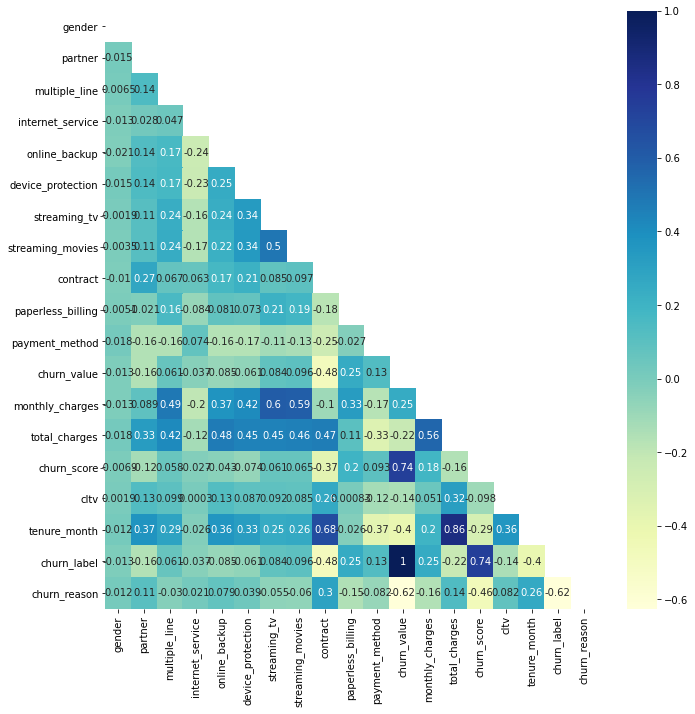

In [65]:
correlation_between_column = non_outlier_df[numeric_column_filtered].corr()
upper_triangle_corr = np.triu(correlation_between_column)

fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(correlation_between_column, annot = True, cmap="YlGnBu",ax=ax,annot_kws={"size":10},mask=upper_triangle_corr)

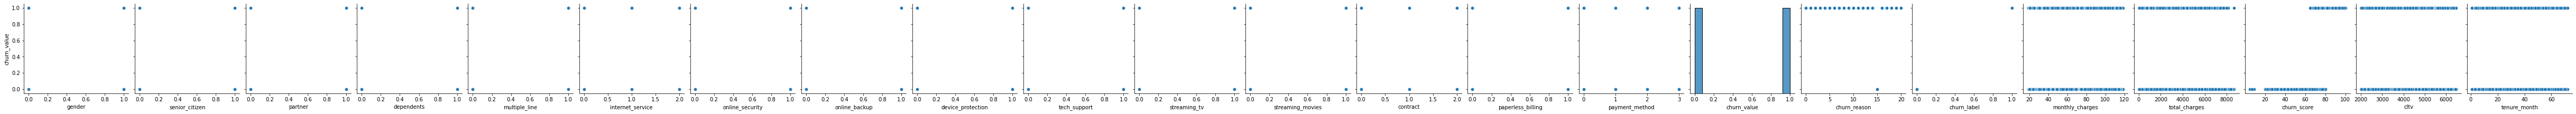

In [66]:
scatter_plot_between_target_feature = sns.pairplot(
    data=dfn,
    y_vars=['churn_value'],
    x_vars=numeric_column,
    height=3,
    kind='scatter'
    )

In [67]:
numeric_column_final = ['senior_citizen','dependents','multiple_line','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','payment_method','churn_value','churn_reason','monthly_charges','tenure_month']

Understanding:
* There are too many collinearity between each features
* Data that don't have relation with Churn Value from EDA will be drop
* Correlation value between each data that are reaching 1 will be drop
* Some Features can't be shown in the correlation heatmap because of the statistical equation for each column can't cover it all

## Prediction Modeling

### Initialization

In [68]:
final_column = numeric_column_final
final_df = non_outlier_df[final_column]

In [69]:
target_column = ['churn_value']
final_feature_array = final_df[numeric_column_final].to_numpy()
target_array = final_df[target_column].to_numpy()

### Support Vector Machine

In [70]:
import warnings
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import sklearn.metrics as metrics
from sklearn.svm import SVC
warnings.simplefilter(action='ignore', category=FutureWarning)

In [71]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    final_feature_array,
    target_array,
    train_size=0.8,
    random_state=0
    )

In [72]:
print('Shape Data X Train:')
print(X_train.shape)
print('\nShape Data X Test:')
print(X_test.shape)
print('\nShape Data y Train:')
print(y_train.shape)
print('\nShape Data y Test:')
print(y_test.shape)

Shape Data X Train:
(2945, 15)

Shape Data X Test:
(737, 15)

Shape Data y Train:
(2945, 1)

Shape Data y Test:
(737, 1)


In [73]:
svm=SVC(probability=True)

In [74]:
svm.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [75]:
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)
target_array_pred = svm.predict(final_feature_array)

In [76]:
print('Real Data')
print(y_train[:5])
print('\n Predicted Data')
print(y_train_pred[:5])

Real Data
[[1]
 [1]
 [0]
 [0]
 [0]]

 Predicted Data
[1 1 0 0 1]


In [77]:
accuracy_training = metrics.accuracy_score(y_train,y_train_pred)
accuracy_test = metrics.accuracy_score(y_test,y_test_pred)

In [78]:
print('Support Vector Machine Accuracy Training Data:',accuracy_training*100,'%')
print('Support Vector Machine Accuracy Test Data:',accuracy_test*100,'%')

Support Vector Machine Accuracy Training Data: 86.6213921901528 %
Support Vector Machine Accuracy Test Data: 87.38127544097694 %


Understanding:
* Test data splitted from 20% total data while Train data 80% from total Data.
* The Test has similar accuracy with the Training.

## Evaluation

### Confusion Matrix

#### F1-Score

In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, roc_auc_score

In [80]:
labels = y_test

In [81]:
predictions = y_test_pred

In [82]:
TP = 0
for i in range(0,len(labels)):
    if labels[i] == predictions[i] and labels[i] == 1:
       TP+=1
print("True Positive: ", TP) # 3

True Positive:  289


In [83]:
FP = 0
for i in range(0,len(labels)):
    if labels[i] == 0 and predictions[i] == 1:
       FP+=1
print("False Positive: ", FP) # 3

False Positive:  21


In [84]:
TN = 0
for i in range(0,len(labels)):
    if labels[i] == predictions[i] and labels[i] == 0:
       TN+=1
print("True Negative: ", TN) # 0

True Negative:  355


In [85]:
FN = 0
for i in range(0,len(labels)):
    if labels[i] == 1 and predictions[i] == 0:
       FN+=1
print("False Negative: ", FN) # 4

False Negative:  72


In [86]:
CP = 0
for i in range(0,len(labels)):
    if labels[i] == predictions[i]:
       CP+=1
print("Correct Prediction: ", CP) # 3
print(CP == TP + TN) # True

Correct Prediction:  644
True


In [87]:
ICP = 0
for i in range(0,len(labels)):
    if labels[i] != predictions[i]:
       ICP+=1
print("Incorrect Prediction: ", ICP)# 7
print(ICP == FP + FN) # True

Incorrect Prediction:  93
True


In [88]:
accuracy = (TP + TN)/(TP + FP + TN + FN)
print('Accuracy Score',accuracy*100,'%') 

Accuracy Score 87.38127544097694 %


In [89]:
recall = (TP)/(TP+FN)
print('Recall Score:',recall*100)

Recall Score: 80.05540166204986


In [90]:
precision = TP/(TP+FP)
print('Precision Score:',precision*100,'%')

Precision Score: 93.2258064516129 %


In [91]:
AM = (1 + 0.2)/2
HM = 2*(1*0.2)/(1+0.2)
print('Arithmetic Mean:',AM*100,'%')# 0.6
print('Harmonic Mean:',HM*100,'%')# 0.333

Arithmetic Mean: 60.0 %
Harmonic Mean: 33.333333333333336 %


In [92]:
f1 = 2*(precision * recall)/(precision + recall)
print('F1 Score:',f1*100,'%')

F1 Score: 86.14008941877796 %


In [93]:
confusion = confusion_matrix(labels, predictions)
FN = confusion[1][0]
TN = confusion[0][0]
TP = confusion[1][1]
FP = confusion[0][1]

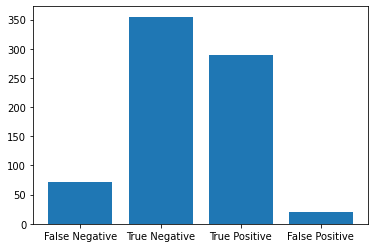

In [94]:
plt.bar(['False Negative' , 'True Negative' , 'True Positive' , 'False Positive'],[FN,TN,TP,FP])
plt.show()

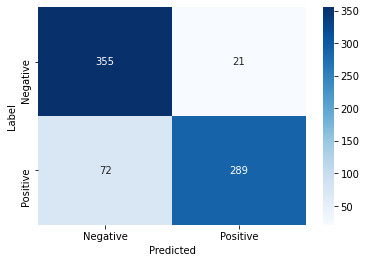

In [95]:
sns.heatmap(confusion , annot=True , xticklabels=['Negative' , 'Positive'] , yticklabels=['Negative' , 'Positive'], cmap='Blues', fmt='g')
plt.ylabel("Label")
plt.xlabel("Predicted")
plt.show()

#### ROC AUC

In [96]:
y_score = svm.fit(X_train, y_train).predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [97]:
cm_test = confusion_matrix(y_test_pred, y_test)
cm_train = confusion_matrix(y_train_pred, y_train)

In [98]:
Cross_validated_ROC_AUC = cross_val_score(svm, X_train, y_train, cv=5, scoring='roc_auc').mean()
ROC_AUC = roc_auc_score(y_test, y_test_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 
Cross validated ROC AUC : 0.8988
ROC AUC : 0.8724


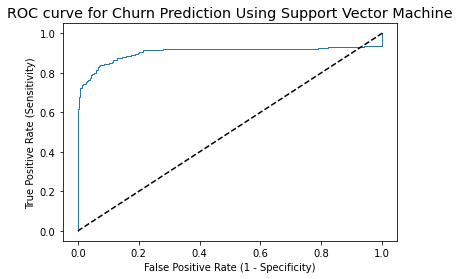

In [99]:
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Churn Prediction Using Support Vector Machine')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
print(' ')
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))
print('ROC AUC : {:.4f}'.format(ROC_AUC))
plt.show()

Understanding:
* ROC AUC scores similar to SVM Model Scores 0.86

## Conclusion
* By using SVM and evaluated with ROC AUC we got the score of 0.86 prediction accuracy
* Only 15 out of 32 column that are used as a features